In [9]:
import pandas as pd
from ta.trend import SMAIndicator, MACD
from ta.momentum import RSIIndicator
import pynance as pn
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#loading the datas
file_paths = {
    'AAPL': '../data/AAPL_historical_data.csv',
    'GOOGL': '../data/AMZN_historical_data.csv',
    'AMZN': '../data/GOOG_historical_data.csv',
    'MSFT': '../data/META_historical_data.csv',
    'TSLA': '../data/MSFT_historical_data.csv',
    'META': '../data/NVDA_historical_data.csv',
    'NFLX': '../data/TSLA_historical_data.csv'
}

stock_data = {}

for company, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['Date'])
    df.set_index('Date', inplace=True) 
    stock_data[company] = df


In [3]:
#cleaning - drop any missing datasets
for name, df in stock_data.items():
    stock_data[name] = df.dropna()
    print(f"{name}: {stock_data[name].isnull().sum().sum()} missing values after dropping")


AAPL: 0 missing values after dropping
GOOGL: 0 missing values after dropping
AMZN: 0 missing values after dropping
MSFT: 0 missing values after dropping
TSLA: 0 missing values after dropping
META: 0 missing values after dropping
NFLX: 0 missing values after dropping


In [4]:
#technical indicators
def apply_technical_indicators(df, window_sma=20, window_rsi=14):
    df = df.copy()
    
    # SMA
    sma = SMAIndicator(close=df['Close'], window=window_sma)
    df['SMA'] = sma.sma_indicator()
    
    # RSI
    rsi = RSIIndicator(close=df['Close'], window=window_rsi)
    df['RSI'] = rsi.rsi()
    
    # MACD
    macd = MACD(close=df['Close'])
    df['MACD'] = macd.macd()
    df['MACD_signal'] = macd.macd_signal()
    df['MACD_diff'] = macd.macd_diff()
    
    return df.dropna()

In [5]:
#apply for all companies
for company in stock_data:
    stock_data[company] = apply_technical_indicators(stock_data[company])

In [7]:
tickers = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'TSLA', 'META', 'NFLX']
stock_metrics = {}

for ticker in tickers:
    df = pn.data.get(ticker, start='2022-01-01', end='2023-01-01')
    daily_returns = df['Close'].pct_change()
    stock_metrics[ticker] = {
        'data': df,
        'daily_returns': daily_returns,
        'cumulative_returns': (1 + daily_returns).cumprod(),
        'volatility': daily_returns.std(),
        'rolling_mean': df['Close'].rolling(20).mean(),
        'rolling_std': df['Close'].rolling(20).std()
    }


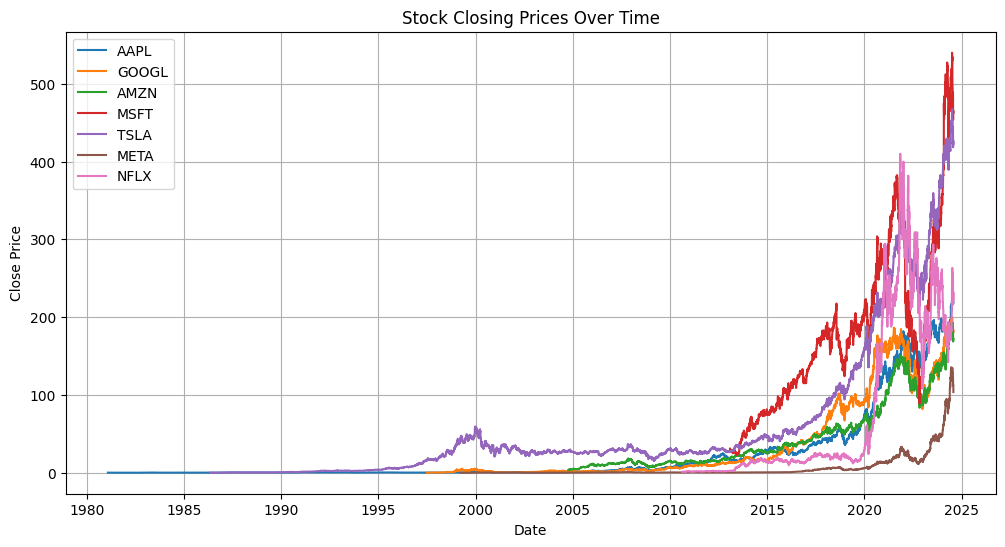

In [10]:
#VISUALIZATION
#Line Plot of Stock Prices
plt.figure(figsize=(12, 6))
for name, df in stock_data.items():
    plt.plot(df.index, df['Close'], label=name)

plt.title("Stock Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()

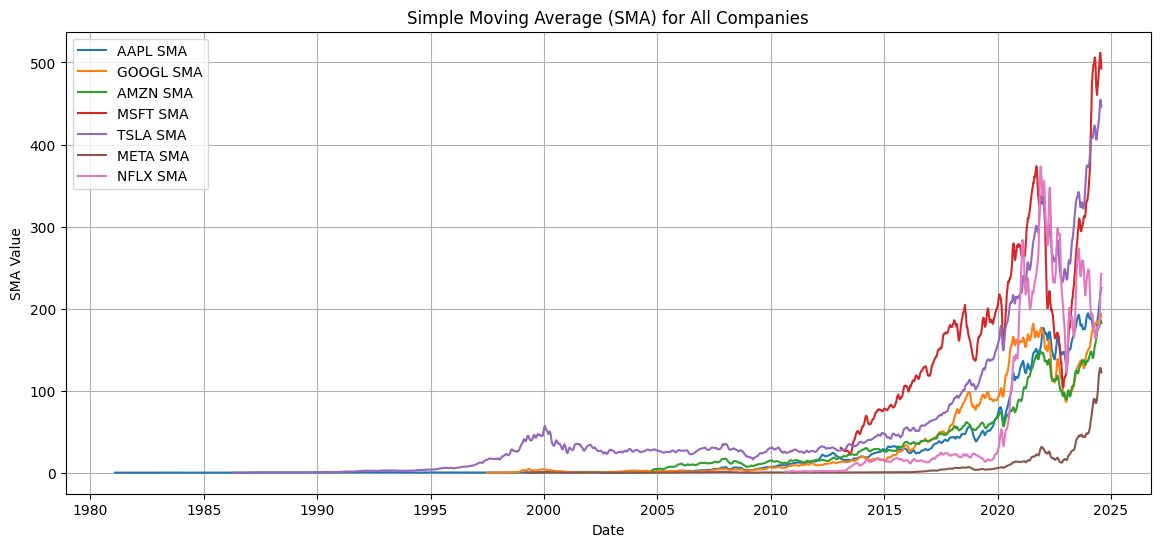

In [11]:
#Plot with SMA (Simple Moving Average)
plt.figure(figsize=(14, 6))
for name, df in stock_data.items():
    plt.plot(df.index, df['SMA'], label=f'{name} SMA')
plt.title('Simple Moving Average (SMA) for All Companies')
plt.xlabel('Date')
plt.ylabel('SMA Value')
plt.legend()
plt.grid(True)
plt.show()


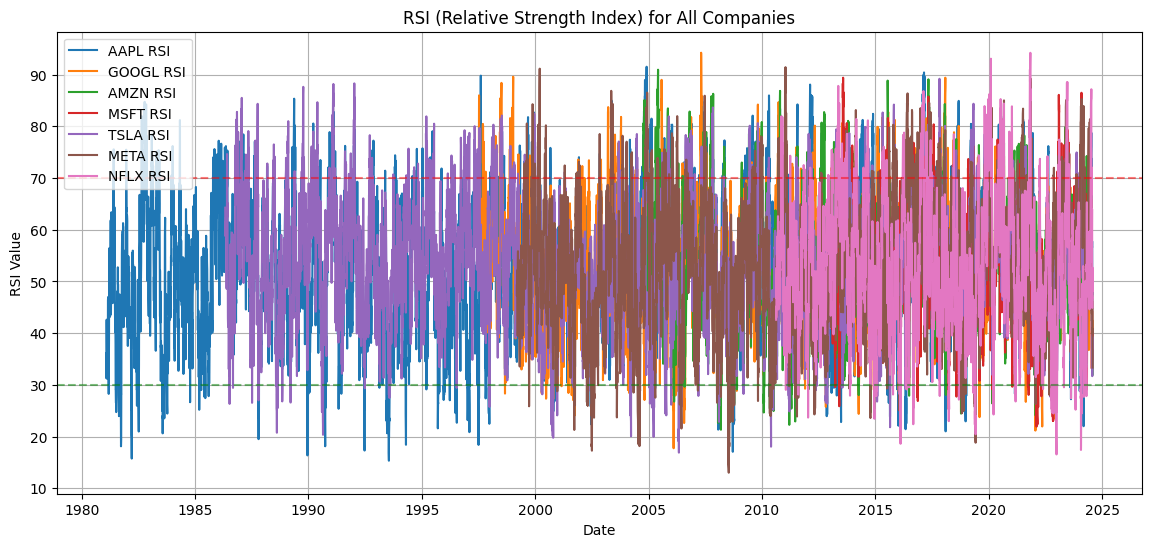

In [12]:
#RSI (Relative Strength Index) Plot
plt.figure(figsize=(14, 6))
for name, df in stock_data.items():
    plt.plot(df.index, df['RSI'], label=f'{name} RSI')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('RSI (Relative Strength Index) for All Companies')
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.legend()
plt.grid(True)
plt.show()


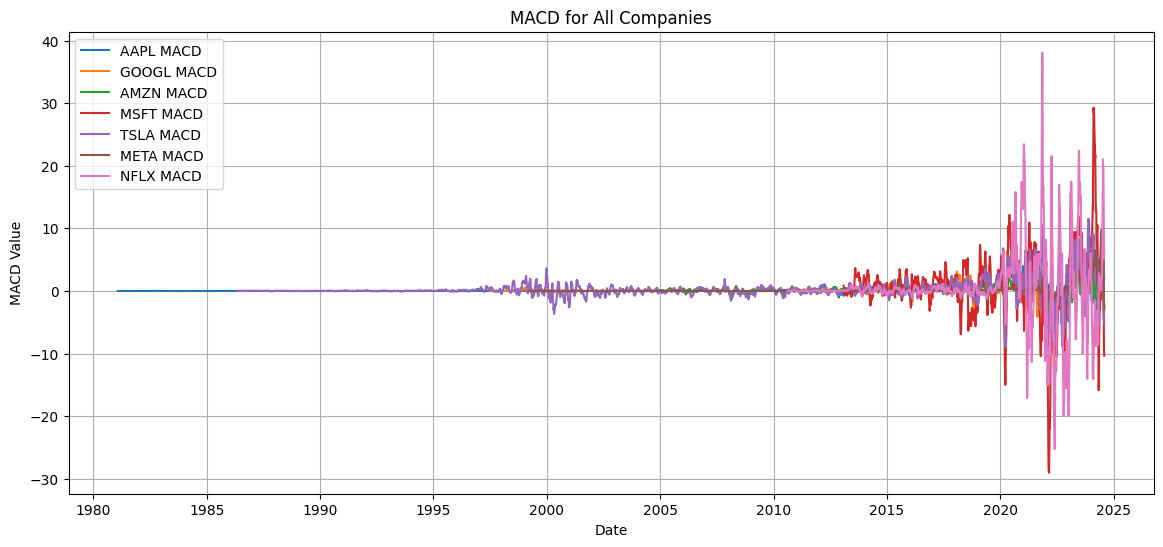

In [13]:
#MACD (Moving Average Convergence Divergence)
plt.figure(figsize=(14, 6))
for name, df in stock_data.items():
    plt.plot(df.index, df['MACD'], label=f'{name} MACD')
plt.title('MACD for All Companies')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.legend()
plt.grid(True)
plt.show()


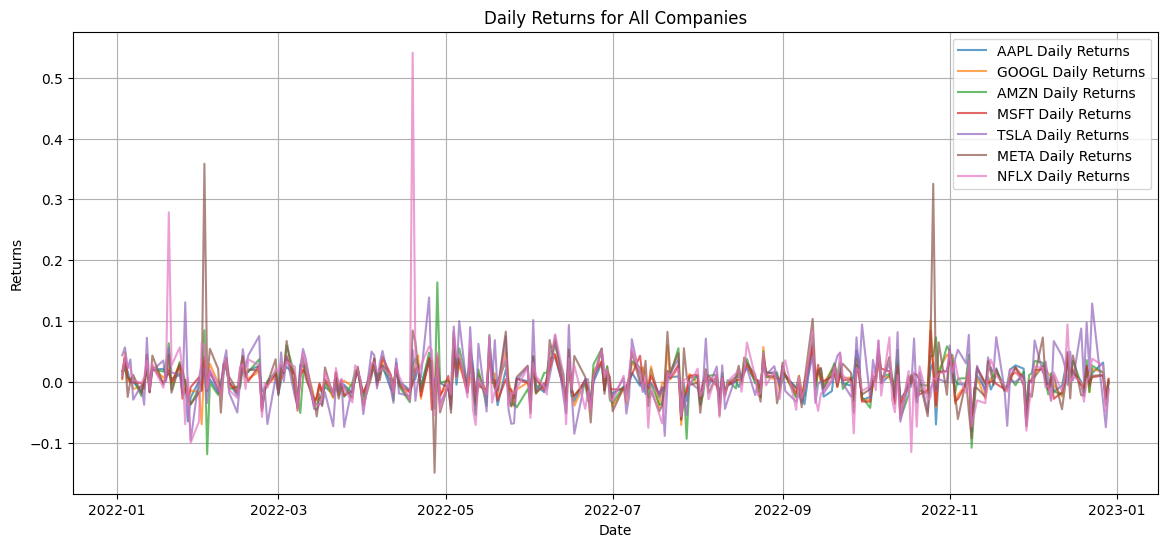

In [15]:
#Daily Returns for All Companies
plt.figure(figsize=(14, 6))
for ticker in tickers:
    plt.plot(stock_metrics[ticker]['daily_returns'].index, stock_metrics[ticker]['daily_returns'], label=f"{ticker} Daily Returns", alpha=0.7)
plt.title("Daily Returns for All Companies")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.grid(True)
plt.show()
